Task-2: Restuarant Recommendation

• Objective: Create a restaurant recommendation system based on user preferences.
• Steps:
• Preprocess the dataset by handling missing values and encoding categorical variables.
• Determine the criteria for restaurant recommendations (e.g., cuisine preference, price range).
• Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.
• Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations. consider me as a begineer and provide me code with steps

Importing python libraries and datasets

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

Importing files:

In [147]:
dataset = pd.read_csv('/content/Dataset .csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Data analytics:

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [149]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Checking for null values:

In [150]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Removing null values:

In [151]:
dataset['Cuisines'].fillna(dataset['Cuisines'].median,inplace=True)

In [152]:
dataset.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [153]:
dataset.shape

(9551, 21)

In [154]:
dataset.duplicated().sum()

0

Displaying column names:

In [155]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [156]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(subset=['Cuisines'], inplace=True)
dataset['Cuisines'].value_counts().unique()

array([936, 511, 354, 334, 299, 218, 197, 170, 149, 131, 118, 116, 112,
       108, 105, 103,  83,  74,  71,  70,  68,  65,  63,  62,  60,  56,
        54,  53,  51,  49,  46,  44,  43,  42,  41,  36,  35,  34,  31,
        28,  26,  24,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [157]:
 dataset.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [158]:
new_column_names = {
    'Restaurant ID': 'restaurant_id',
    'Restaurant Name': 'restaurant_name',
    'City': 'city',
    'Longitude': 'longitude',
    'Latitude': 'latitude',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'average_cost_for_two',
    'Price range': 'price_range',
    'Aggregate rating': 'aggregate_rating',
    'Votes': 'votes'
}
dataset.rename(columns=new_column_names, inplace=True)
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
data_sorted = dataset.sort_values(by='average_cost_for_two')
top_10 = data_sorted.tail(10)
print(top_10)


      restaurant_id              restaurant_name  country_code       city  \
9291        7417455             Talaga Sampireun            94    Jakarta   
9278        7423482                   Lemongrass            94      Bogor   
9285       18391256                        MONKS            94    Jakarta   
9295       18386856                      Onokabe            94  Tangerang   
9288       18352452   Lucky Cat Coffee & Kitchen            94    Jakarta   
9294        7422489  Avec Moi Restaurant and Bar            94    Jakarta   
9289        7421967               3 Wise Monkeys            94    Jakarta   
9287        7420899                   Sushi Masa            94    Jakarta   
9284        7410290     Satoo - Hotel Shangri-La            94    Jakarta   
9283        7402935                         Skye            94    Jakarta   

                                                address  \
9291  Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...   
9278      Jl. Raya Pajajaran No. 2

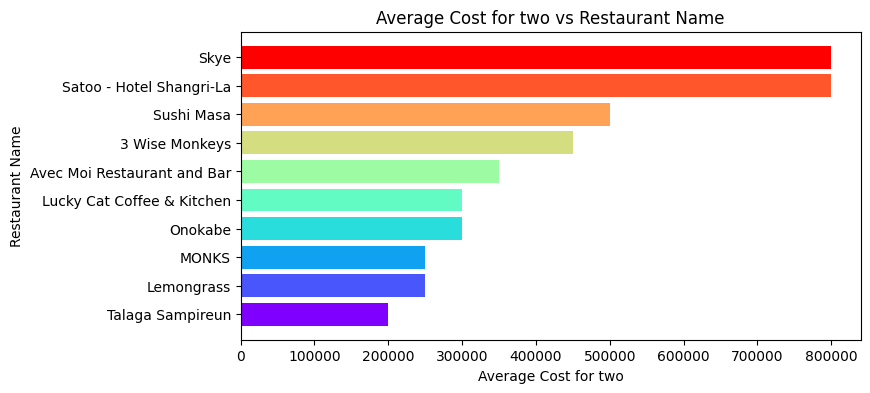

In [159]:
plt.figure(figsize=(8,4))
colors_top = cm.rainbow(np.linspace(0, 1, len(top_10)))
plt.barh(top_10['restaurant_name'], top_10['average_cost_for_two'], color=colors_top)
plt.xlabel('Average Cost for two')
plt.ylabel('Restaurant Name')
plt.title('Average Cost for two vs Restaurant Name')
plt.show()

Data Preprocessing:

In [160]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = dataset[column].astype(str)
    dataset[column] = label_encoders[column].fit_transform(dataset[column])
dataset.head(5)

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,921,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1112,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1672,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1127,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1123,...,0,1,0,0,0,4,4.8,0,1,229


In [161]:
dataset.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

Data splitting:

In [162]:
X = dataset.drop('cuisines', axis=1)
y = dataset['cuisines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [163]:
columns_to_remove = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Longitude', 'Latitude']
existing_columns = dataset.columns

for col in columns_to_remove:
    if col in existing_columns:
        dataset.drop(columns=col, inplace=True)
        print(f"Removed column: {col}")
dataset


,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,921,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1112,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1672,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1127,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1123,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1814,...,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,1310,208,140,5962,552,558,29.041297,41.009847,1825,...,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,3068,208,140,5966,554,561,29.034640,41.055817,1111,...,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,512,208,140,5967,554,561,29.036019,41.057979,1658,...,11,0,0,0,0,4,4.0,1,5,901


Cosine Similarity Matrix

In [164]:
features = ['cuisines', 'price_range', 'aggregate_rating']
restaurant_features = dataset[features]
similarity_matrix = cosine_similarity(restaurant_features)

print("\nCosine Similarity Matrix:")
print(similarity_matrix)


Cosine Similarity Matrix:
[[1.         0.99999916 0.9999963  ... 0.99999817 0.99999573 0.99997281]
 [0.99999916 1.         0.99999895 ... 0.99999934 0.99999862 0.99996246]
 [0.9999963  0.99999895 1.         ... 0.99999903 0.99999998 0.99994908]
 ...
 [0.99999817 0.99999934 0.99999903 ... 1.         0.99999887 0.99995907]
 [0.99999573 0.99999862 0.99999998 ... 0.99999887 1.         0.99994706]
 [0.99997281 0.99996246 0.99994908 ... 0.99995907 0.99994706 1.        ]]


Test Recommendation

In [165]:
def test_recommendation_system(preferences, dataset, similarity_matrix):

    recommendations = recommend_restaurants(preferences, similarity_matrix, dataset, top_n=3)

    print("User Preferences:")
    print(preferences)
    if not recommendations.empty:
        print("\nRecommended Restaurants:")
        print(recommendations)
    else:
        print("No matching restaurants found for the given preferences.")
sample_user_preferences = {
    'cuisines': dataset['cuisines'][2],
    'price_range': dataset['price_range'][2],
    'aggregate_rating': dataset['aggregate_rating'][2]
}

test_recommendation_system(sample_user_preferences, dataset, similarity_matrix)


User Preferences:
{'cuisines': 1672, 'price_range': 4, 'aggregate_rating': 4.4}

Recommended Restaurants:
      restaurant_id  restaurant_name  country_code  city  address  locality  \
9456        6400217             7282           189    22     5475      1146   
4152       18245258             2739             1    88     3848       477   
6636         305082             2645             1    88     5738       835   

      locality_verbose  longitude   latitude  cuisines  ...  currency  \
9456              1201  18.421000 -33.904167      1685  ...         9   
4152               483  77.101117  28.625289       829  ...         4   
6636               848  77.119244  28.647540      1291  ...         4   

      has_table_booking  has_online_delivery  is_delivering_now  \
9456                  0                    0                  0   
4152                  0                    1                  0   
6636                  0                    0                  0   

      switch_to